# Project Requirements#
## For both projects, you are required to:
### 1. **Data Reading:** Load and read the dataset properly.

In [ ]:
# If matplotlib not installed
import sys
!"{sys.executable}" -m pip install matplotlib
# Then Restart Kernal

In [ ]:
# If seaborn not installed
import sys
!"{sys.executable}" -m pip install seaborn
# Then Restart Kernal

In [1]:
# Import needed libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LoanApprovalPrediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Exploratory Data Analysis (EDA):
#### o Perform a complete data analysis using suitable visualizations according to each feature type:


#### ▪ For categorical features, use bar charts or pie charts. etc

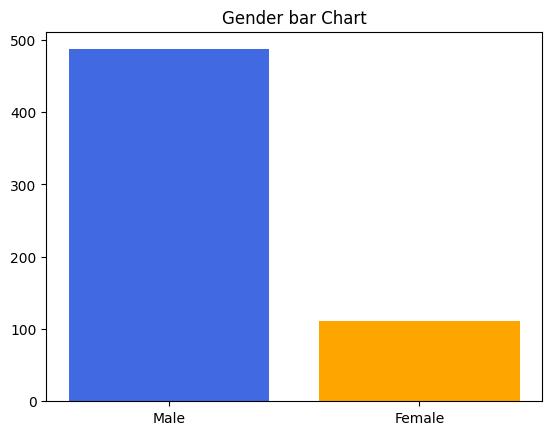

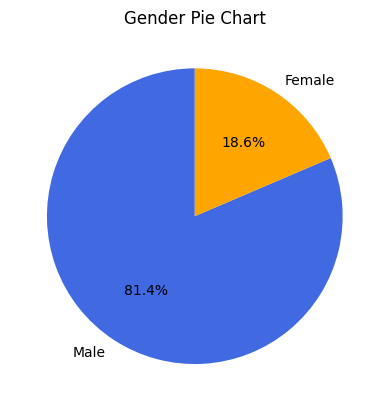

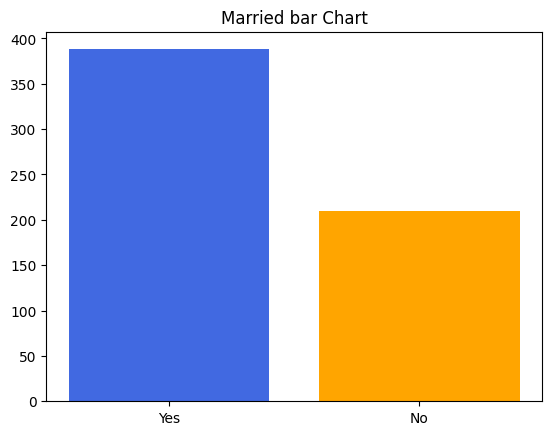

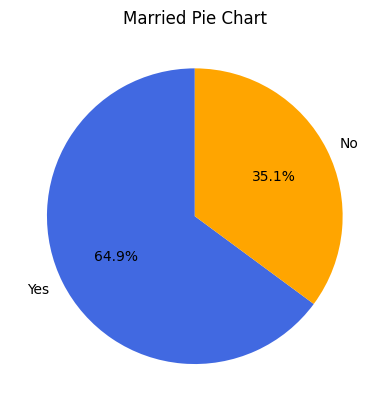

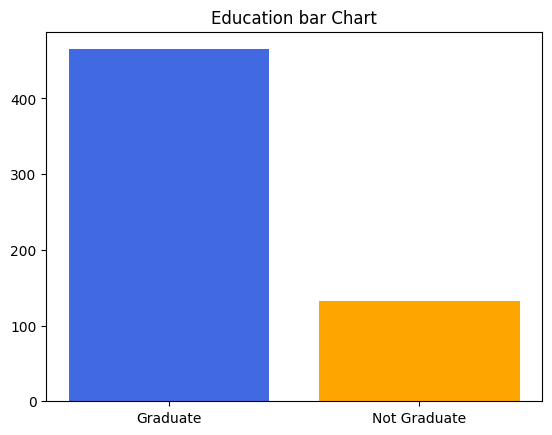

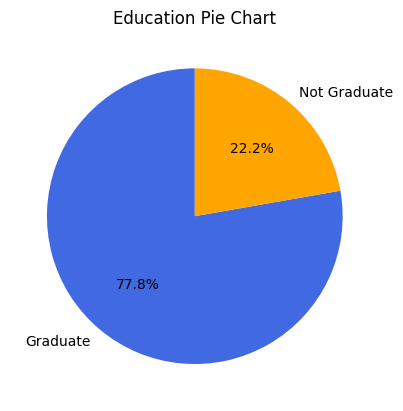

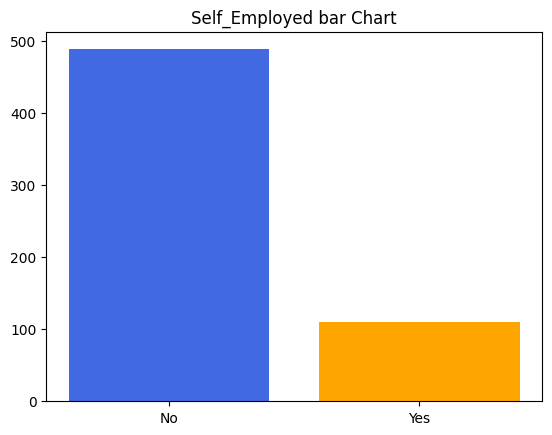

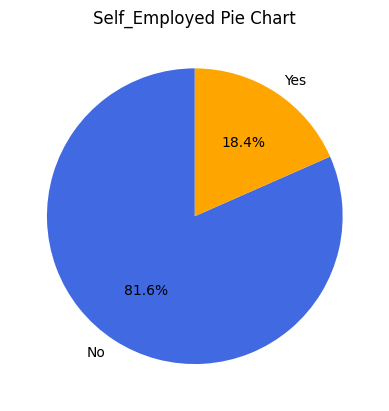

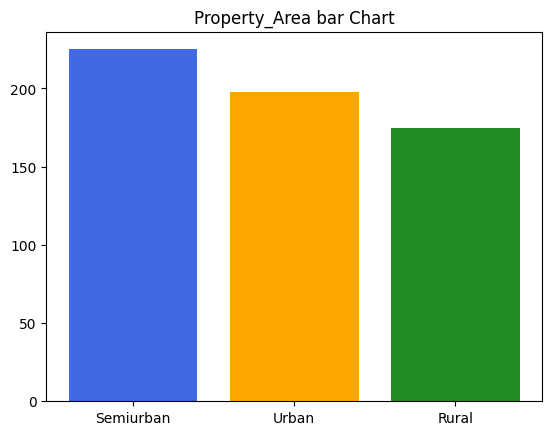

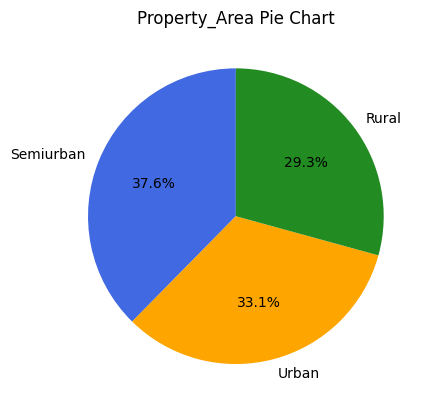

In [3]:
# Categorical Features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    counts = data[col].value_counts()
    
    # bar charts
    plt.bar(
        counts.index, 
        counts.values,
        color=['royalblue', 'orange', 'forestgreen']
    )
    plt.title(f'{col} bar Chart')
    plt.show()

    # pie charts
    plt.pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90, 
        colors=['royalblue', 'orange', 'forestgreen']
    )
    plt.title(f'{col} Pie Chart')
    plt.show()

#### ▪ For continuous features, use scatter plots. etc

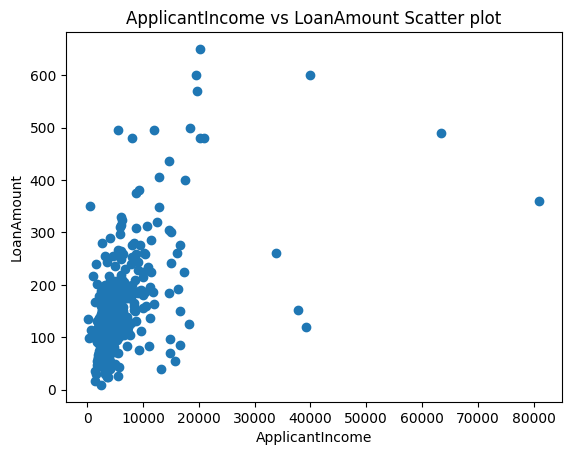

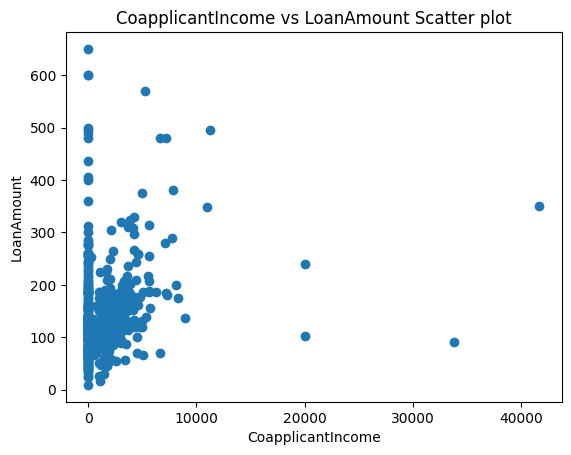

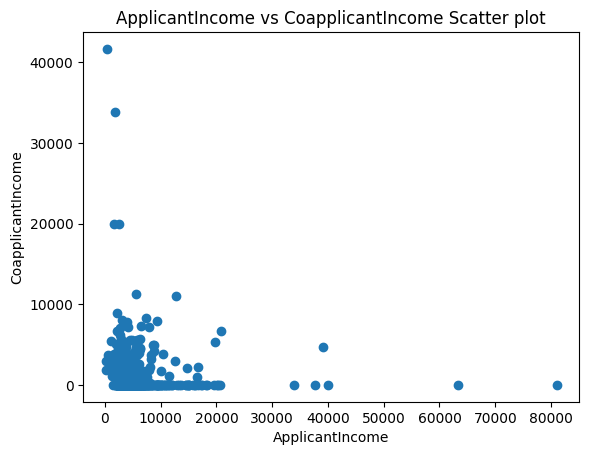

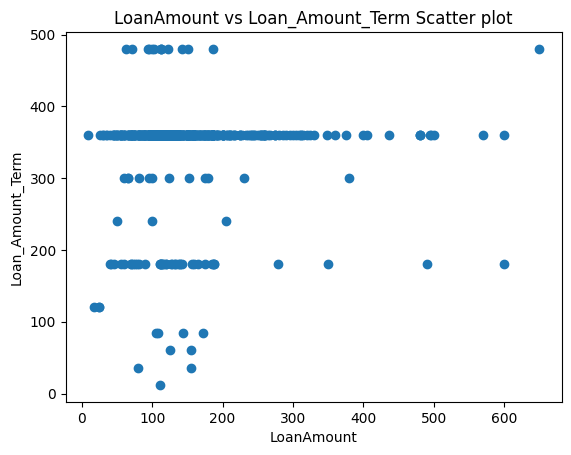

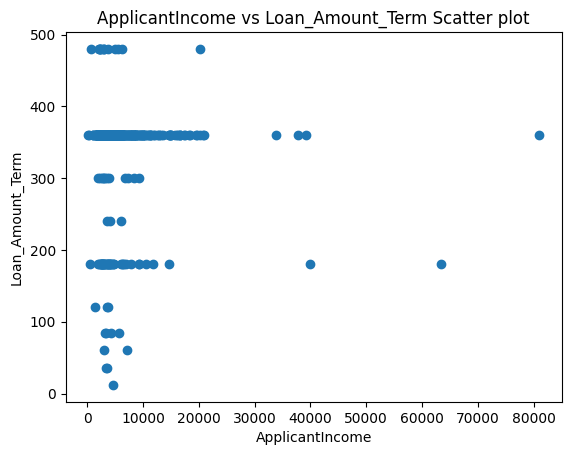

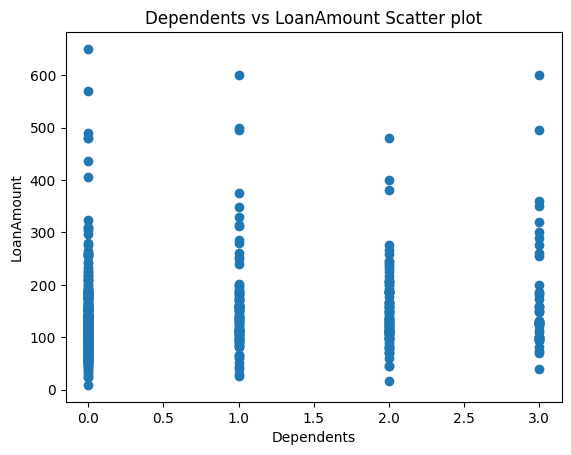

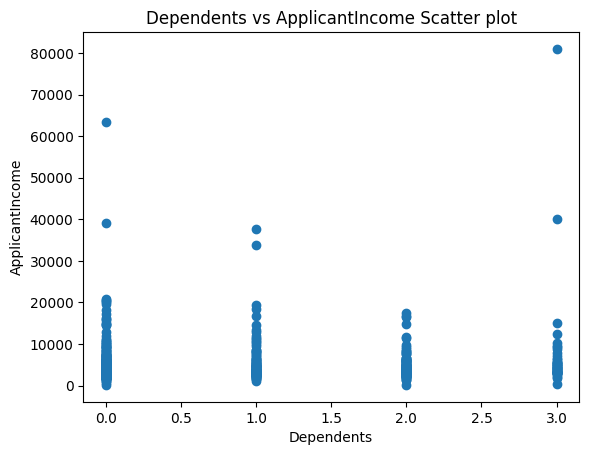

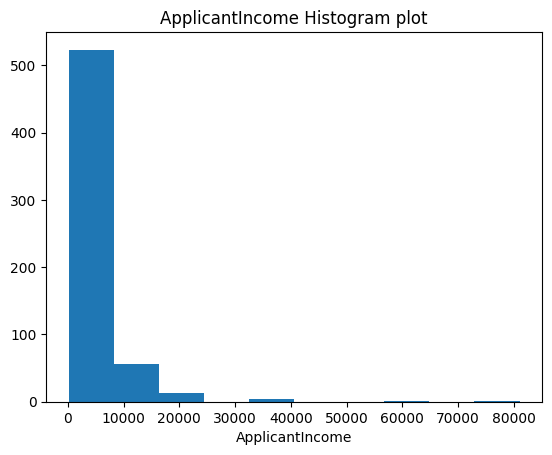

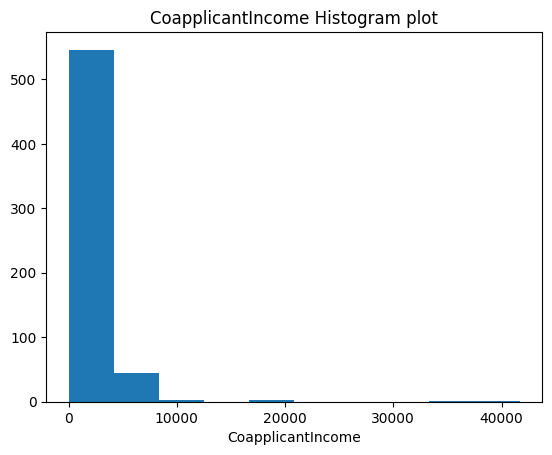

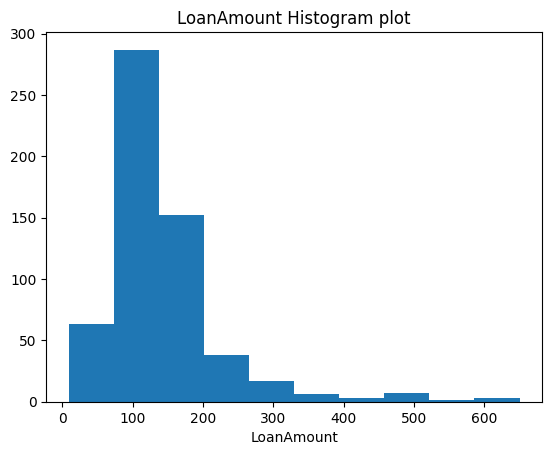

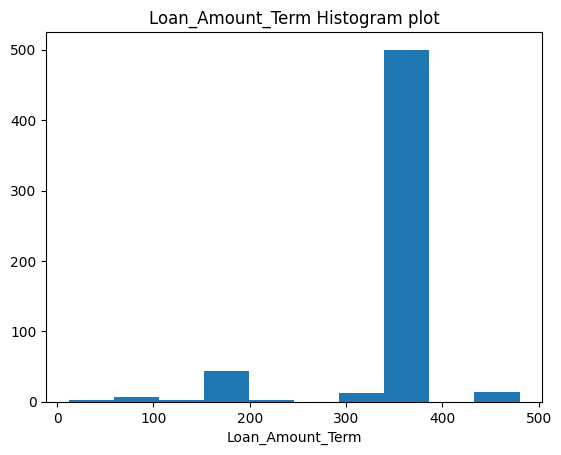

In [4]:
# Continuous Features
continuous_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'
]
continuous_pairs = [
    ('ApplicantIncome', 'LoanAmount'),
    ('CoapplicantIncome', 'LoanAmount'),
    ('ApplicantIncome', 'CoapplicantIncome'),
    ('LoanAmount', 'Loan_Amount_Term'),
    ('ApplicantIncome', 'Loan_Amount_Term'),
    ('Dependents', 'LoanAmount'),
    ('Dependents', 'ApplicantIncome')
]
for x,y in continuous_pairs:
    # scatter plot
    plt.scatter(data[x], data[y])
    plt.title(f'{x} vs {y} Scatter plot')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

for col in continuous_cols:
    # histogram plot
    plt.hist(data[col])
    plt.title(f'{col} Histogram plot')
    plt.xlabel(col)
    plt.show()

#### o Detect and analyze outliers using box plots. etc

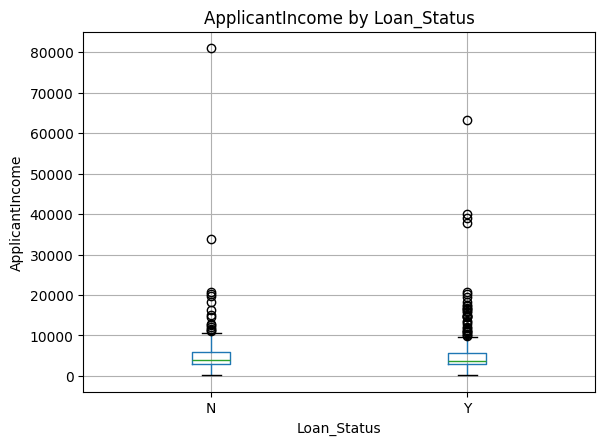

ApplicantIncome (grouped by Loan_Status): 48 outliers from total 598 items


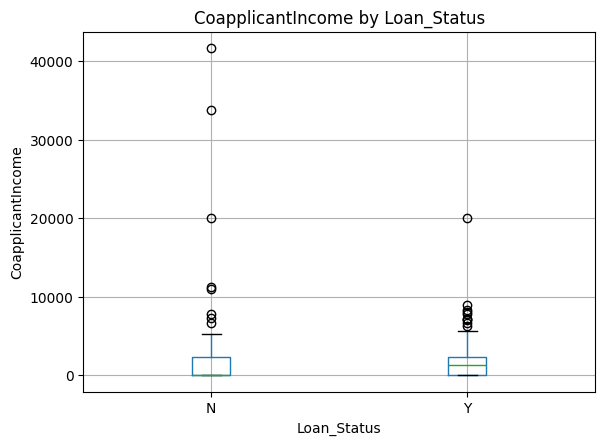

CoapplicantIncome (grouped by Loan_Status): 18 outliers from total 598 items


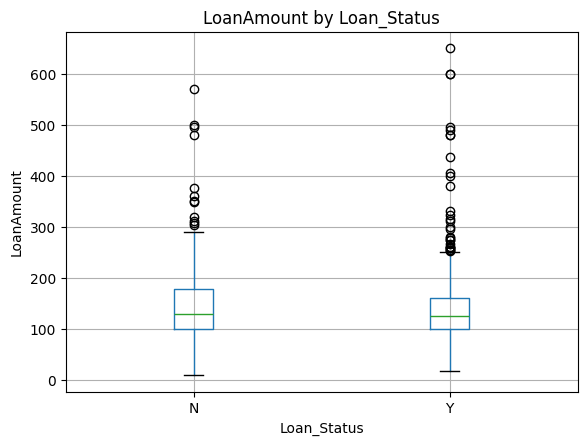

LoanAmount (grouped by Loan_Status): 36 outliers from total 598 items


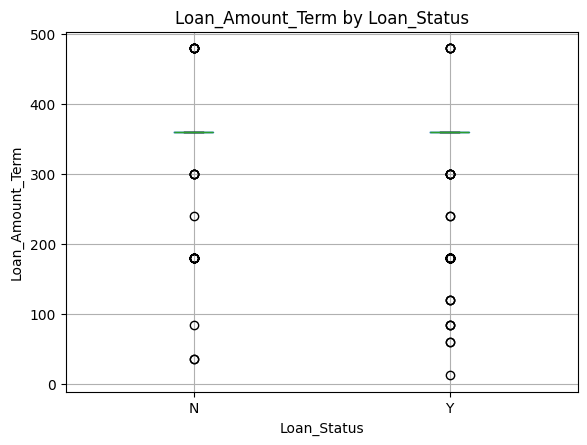

Loan_Amount_Term (grouped by Loan_Status): 84 outliers from total 598 items


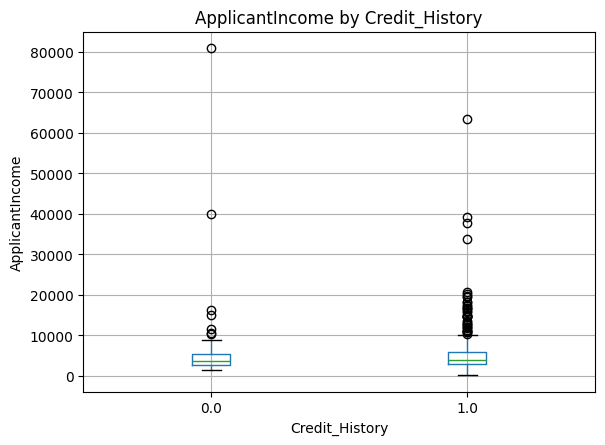

ApplicantIncome (grouped by Credit_History): 48 outliers from total 598 items


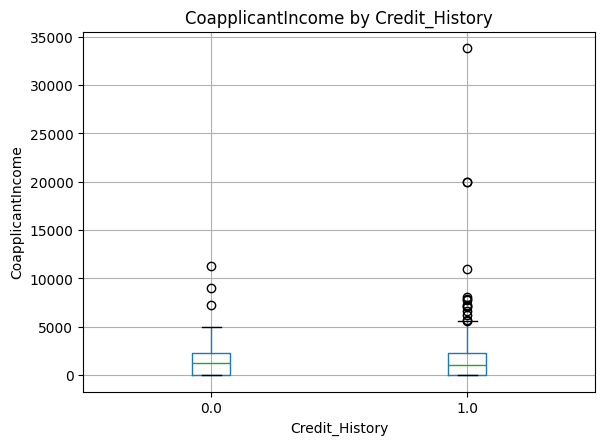

CoapplicantIncome (grouped by Credit_History): 18 outliers from total 598 items


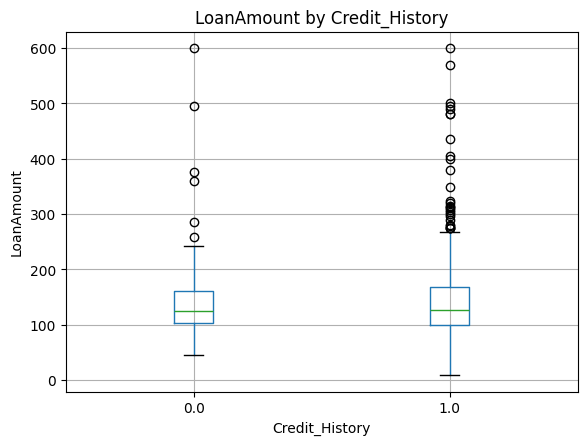

LoanAmount (grouped by Credit_History): 36 outliers from total 598 items


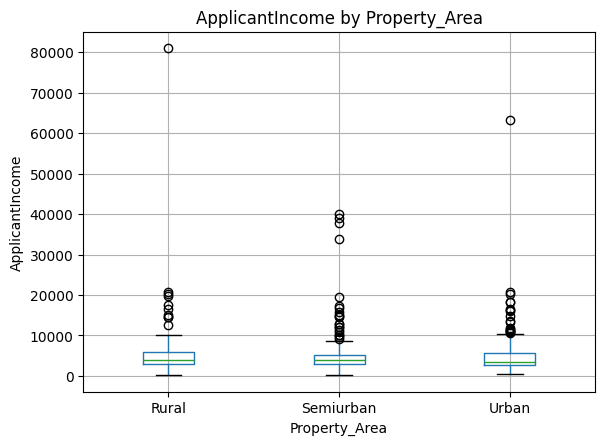

ApplicantIncome (grouped by Property_Area): 48 outliers from total 598 items


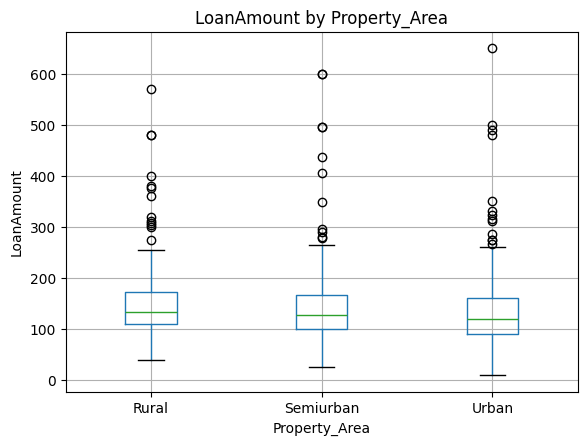

LoanAmount (grouped by Property_Area): 36 outliers from total 598 items


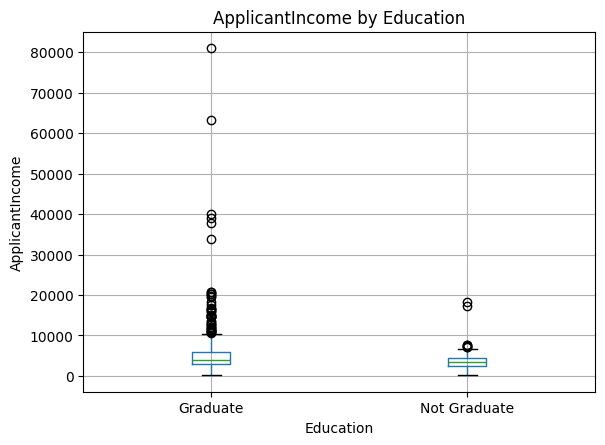

ApplicantIncome (grouped by Education): 48 outliers from total 598 items


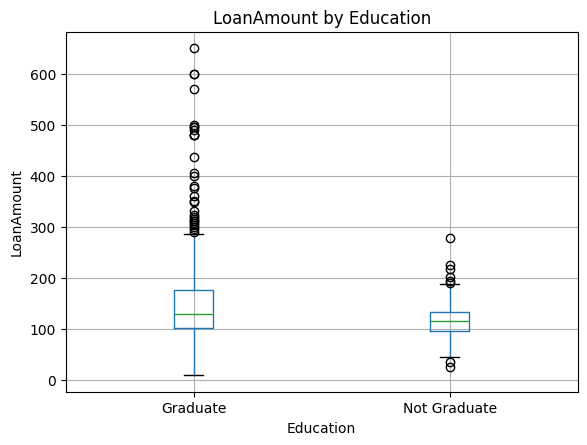

LoanAmount (grouped by Education): 36 outliers from total 598 items


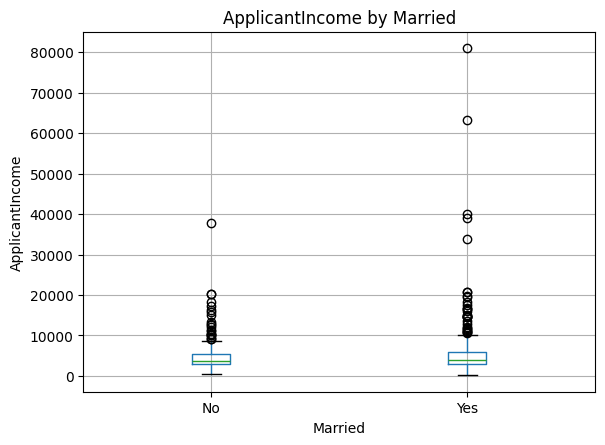

ApplicantIncome (grouped by Married): 48 outliers from total 598 items


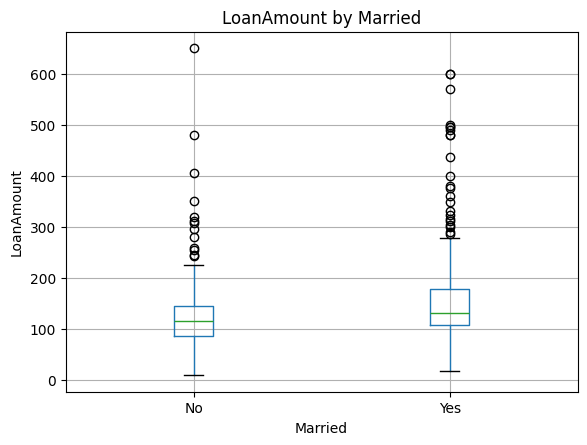

LoanAmount (grouped by Married): 36 outliers from total 598 items


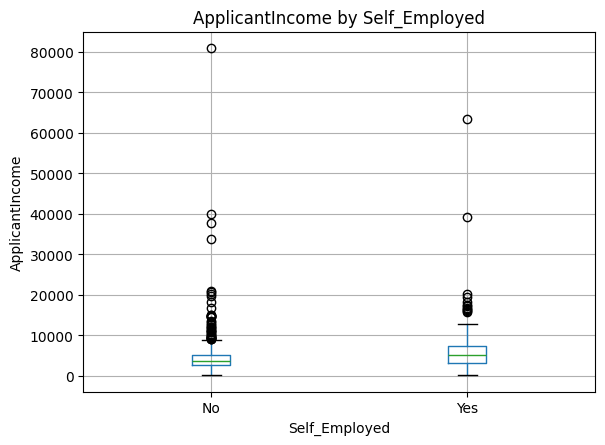

ApplicantIncome (grouped by Self_Employed): 48 outliers from total 598 items


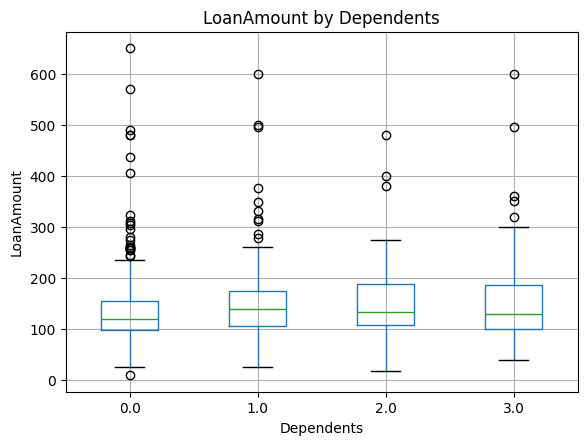

LoanAmount (grouped by Dependents): 36 outliers from total 598 items


In [5]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

continuous_pairs = [
   ('Loan_Status', 'ApplicantIncome'),
    ('Loan_Status', 'CoapplicantIncome'),
    ('Loan_Status', 'LoanAmount'),
    ('Loan_Status', 'Loan_Amount_Term'),

    ('Credit_History', 'ApplicantIncome'),
    ('Credit_History', 'CoapplicantIncome'),
    ('Credit_History', 'LoanAmount'),

    ('Property_Area', 'ApplicantIncome'),
    ('Property_Area', 'LoanAmount'),

    ('Education', 'ApplicantIncome'),
    ('Education', 'LoanAmount'),

    ('Married', 'ApplicantIncome'),
    ('Married', 'LoanAmount'),

    ('Self_Employed', 'ApplicantIncome'),
    ('Dependents', 'LoanAmount')
]

for x, y in continuous_pairs:
    # box plot
    data.boxplot(column=y, by=x)
    plt.title(f'{y} by {x}')
    plt.suptitle('')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    # Detect outliers in Y (overall)
    outliers = detect_outliers(data[y].dropna())
    print(
        f'{y} (grouped by {x}): '
        f'{len(outliers)} outliers from total {len(data[y])} items'
    )

    

#### o Examine the data distribution using histograms. etc

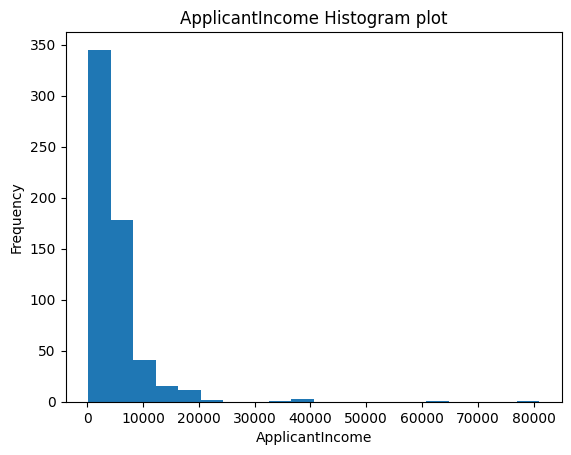

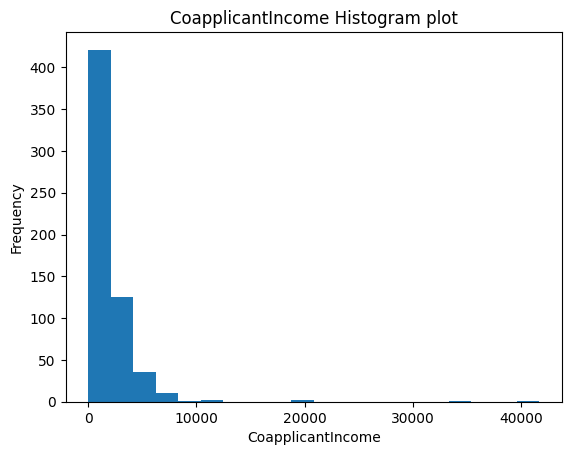

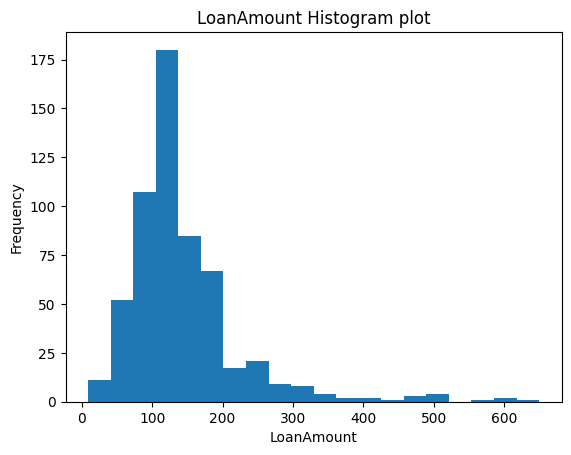

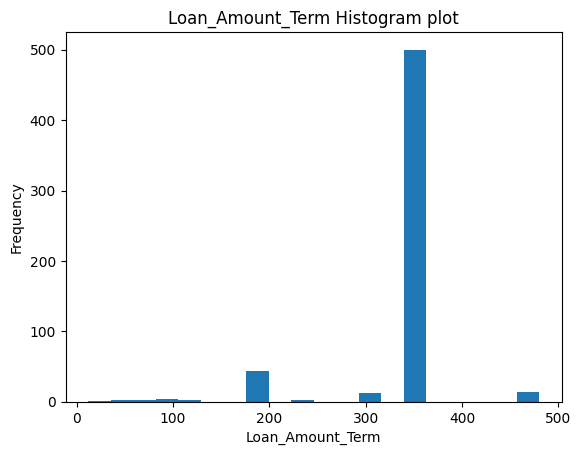

In [6]:
for col in continuous_cols:
    # histogram plot
    plt.hist(data[col].dropna(), bins=20)
    plt.title(f'{col} Histogram plot')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 3. Data Cleaning:
o Handle duplicate values (remove if necessary). \
o Manage missing values (fill or drop as appropriate). \
o Detect and treat outliers using IQR or Z-score methods.

In [7]:
# Handle duplicate records
if(data.duplicated().sum() == 0):
    print('No duplicate records')
else:
    print(f'{data.duplicated().sum()} duplicate records found and dropped')
    data = data.drop_duplicates()   
    
# Detect and treat outliers using IQR
continuous_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in continuous_cols:
    outliers = detect_outliers(data[col].dropna())
    if(len(outliers) > 0):
        #clipping outliers
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        data[col] = data[col].clip(lower, upper)
        print(
            f'{len(outliers)} outliers in {col} from total {len(data[y])} items and clipped them'
        )
        
numberical_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount']
# Manage Missing values
for col in numberical_cols:
    if(data[col].isna().sum() > 0):
        print(f'{data[col].isna().sum()} missing values found in {col} and replaced with median {data[col].median()}')
        data[col] = data[col].fillna(data[col].median())


No duplicate records
48 outliers in ApplicantIncome from total 598 items and clipped them
18 outliers in CoapplicantIncome from total 598 items and clipped them
36 outliers in LoanAmount from total 598 items and clipped them
12 missing values found in Dependents and replaced with median 0.0
14 missing values found in Loan_Amount_Term and replaced with median 360.0
49 missing values found in Credit_History and replaced with median 1.0
21 missing values found in LoanAmount and replaced with median 127.0


### 4. Data Preparation:
o Perform encoding for categorical variables. \
o Ensure all features are transformed into numeric format for further analysis.

In [8]:
# Drop Loan_ID (no predictive value)
data = data.drop(columns=["Loan_ID"])

# Label Encoding for binary categorical variables
binary_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

mappings = {
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    "Education": {"Graduate": 1, "Not Graduate": 0},
    "Self_Employed": {"Yes": 1, "No": 0},
    "Property_Area": {"Urban": 2, "Semiurban": 1, "Rural": 0},
    "Loan_Status": {"Y": 1, "N": 0}
}

for col in binary_cols:
    data[col] = data[col].map(mappings[col])

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849.0,0.0,127.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1


### 5. Feature Analysis:
o Calculate correlations (using Pearson correlation) and r square to identify the relationships between features and the target variable. \
o Evaluate the importance of each feature with respect to the target.

In [9]:
def feature_relationship_summary(df, target):
    corr = df.corr(method="pearson")[target].drop(target)
    r2 = corr ** 2

    summary = pd.DataFrame({
        "Pearson_Correlation": corr,
        "R_Squared": r2
    })

    return summary.sort_values("R_Squared", ascending=False)

feature_summary = feature_relationship_summary(data, "Loan_Status")

feature_summary # To show as a table

,Pearson_Correlation,R_Squared
Credit_History,0.535638,0.286908
Married,0.093183,0.008683
Education,0.081617,0.006661
LoanAmount,-0.059996,0.003600
Property_Area,0.028315,0.000802
Gender,0.021239,0.000451
ApplicantIncome,-0.019665,0.000387
Loan_Amount_Term,-0.018931,0.000358
CoapplicantIncome,0.015562,0.000242
Dependents,0.009105,0.000083


### 6. Insights & Feature Selection:
o Derive the most significant findings from your analysis. \
o Identify and select the most impactful features that influence your target variable.

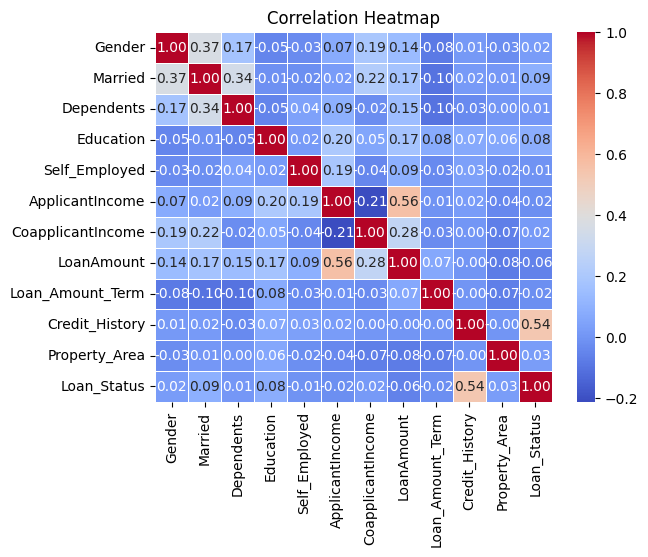

In [10]:
corr_matrix = data.corr(method="pearson")

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",   # warm color style
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

## 6. Insights & Feature Selection

This section presents the key findings derived from the correlation heatmap and outlines the selected features that most strongly influence the target variable (`Loan_Status`).

---

### Key Insights

#### 1. Credit History is the Most Influential Feature
- `Credit_History` shows a **strong positive correlation (~0.54)** with `Loan_Status`.
- This indicates that applicants with a good credit history are significantly more likely to have their loan approved.
- It is the **dominant predictor** in the dataset and must be retained.

---

#### 2. Weak Linear Relationships for Most Features
- Most features exhibit **very low Pearson correlations** with the target variable.
- This suggests that loan approval decisions are:
  - Not driven by single features
  - Influenced by **non-linear relationships and feature interactions**

---

#### 3. Income and Loan Amount Relationships
- `ApplicantIncome` and `LoanAmount` show a **strong positive correlation (~0.56)**.
- `CoapplicantIncome` also correlates positively with `LoanAmount (~0.28)`.
- These features influence loan approval **indirectly**, especially when combined (e.g., income-to-loan ratio).

---

#### 4. Moderate but Weak Predictive Signals
- `Married` (0.09) and `Education` (0.08) show weak positive correlations with `Loan_Status`.
- `LoanAmount` has a weak negative correlation (~–0.06).
- These features may contribute useful context in multivariate models but are not strong predictors on their own.

---

#### 5. Low-Impact Features
The following features have near-zero correlation with the target and add minimal standalone predictive value:
- `Gender`
- `Dependents`
- `Self_Employed`
- `Property_Area`
- `Loan_Amount_Term`

---

### Feature Selection

#### Selected Features (High to Moderate Impact)
The following features are selected for model training based on correlation strength and domain relevance:

- `Credit_History` ⭐
- `ApplicantIncome`
- `CoapplicantIncome`
- `LoanAmount`
- `Education`
- `Married`

---

#### Optional Features
May be included when using non-linear models (e.g., tree-based models) or additional feature engineering:

- `Property_Area`

---

#### Features Recommended for Removal
These features can be dropped to simplify the model with minimal performance loss:

- `Gender`
- `Dependents`
- `Self_Employed`
- `Loan_Amount_Term`

---

### Final Recommended Feature Set

```text
Credit_History
ApplicantIncome
CoapplicantIncome
LoanAmount
Education
Married
